<a href="https://colab.research.google.com/github/VeerVikramSingh/ML/blob/master/LR_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
car=pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/car_sales.csv")
car.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639


In [3]:
car.shape

(156, 16)

In [6]:
print(car.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
Manufacturer          156 non-null object
Model                 156 non-null object
Sales_in_thousands    151 non-null float64
_year_resale_value    156 non-null float64
Vehicle_type          156 non-null object
Price_in_thousands    156 non-null float64
Engine_size           156 non-null float64
Horsepower            156 non-null int64
Wheelbase             156 non-null float64
Width                 156 non-null float64
Length                156 non-null float64
Curb_weight           156 non-null float64
Fuel_capacity         156 non-null float64
Fuel_efficiency       156 non-null int64
Latest_Launch         156 non-null object
Power_perf_factor     156 non-null float64
dtypes: float64(10), int64(2), object(4)
memory usage: 19.6+ KB
None


In [7]:
car.describe()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,151.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,52.051742,18.063571,27.401071,3.060897,185.948718,107.487179,71.150000,187.343590,3.380462,17.951923,23.833333,77.128857
std,68.907116,10.076941,14.305863,1.044653,56.700321,7.641303,3.451872,13.431754,0.629200,3.887921,4.256052,25.084045
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.630000,12.527500,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.567577
50%,27.609000,17.617500,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.160636
75%,65.905500,18.089731,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,89.623790
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [8]:
car.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    5
_year_resale_value    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [9]:
total=(car.isnull().sum()).sort_values(ascending=False)
total

Sales_in_thousands    5
Power_perf_factor     0
Latest_Launch         0
Fuel_efficiency       0
Fuel_capacity         0
Curb_weight           0
Length                0
Width                 0
Wheelbase             0
Horsepower            0
Engine_size           0
Price_in_thousands    0
Vehicle_type          0
_year_resale_value    0
Model                 0
Manufacturer          0
dtype: int64

In [0]:
percent=((car.isnull().sum())/car.isnull().count().sort_values(ascending=False))

In [11]:
percent

Curb_weight           0.000000
Engine_size           0.000000
Fuel_capacity         0.000000
Fuel_efficiency       0.000000
Horsepower            0.000000
Latest_Launch         0.000000
Length                0.000000
Manufacturer          0.000000
Model                 0.000000
Power_perf_factor     0.000000
Price_in_thousands    0.000000
Sales_in_thousands    0.032051
Vehicle_type          0.000000
Wheelbase             0.000000
Width                 0.000000
_year_resale_value    0.000000
dtype: float64

In [12]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Total,Percent
Curb_weight,0,0.000000
Engine_size,0,0.000000
Fuel_capacity,0,0.000000
Fuel_efficiency,0,0.000000
Horsepower,0,0.000000
Latest_Launch,0,0.000000
Length,0,0.000000
Manufacturer,0,0.000000
Model,0,0.000000
Power_perf_factor,0,0.000000


In [18]:
pd.concat([total,percent],axis=1,keys=["Total","Percent"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Total,Percent
Curb_weight,0,0.000000
Engine_size,0,0.000000
Fuel_capacity,0,0.000000
Fuel_efficiency,0,0.000000
Horsepower,0,0.000000
Latest_Launch,0,0.000000
Length,0,0.000000
Manufacturer,0,0.000000
Model,0,0.000000
Power_perf_factor,0,0.000000


In [0]:
car["Sales_in_thousands"].fillna(car["Sales_in_thousands"].median(),inplace=True)

In [20]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
Manufacturer          156 non-null object
Model                 156 non-null object
Sales_in_thousands    156 non-null float64
_year_resale_value    156 non-null float64
Vehicle_type          156 non-null object
Price_in_thousands    156 non-null float64
Engine_size           156 non-null float64
Horsepower            156 non-null int64
Wheelbase             156 non-null float64
Width                 156 non-null float64
Length                156 non-null float64
Curb_weight           156 non-null float64
Fuel_capacity         156 non-null float64
Fuel_efficiency       156 non-null int64
Latest_Launch         156 non-null object
Power_perf_factor     156 non-null float64
dtypes: float64(10), int64(2), object(4)
memory usage: 19.6+ KB


In [21]:
car.isnull().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
_year_resale_value    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [26]:
dummies=pd.get_dummies(car,columns=car["Vehicle_type"],drop_first=True)

KeyError: ignored

In [24]:
car.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639


In [27]:
car.drop([['Manufacturer','Model', 'Latest_Launch']],axis=1,inplace=True)

KeyError: ignored

In [28]:
car.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639


In [0]:
car_df=pd.DataFrame(car)

In [0]:
car.drop(["Model"],axis=1,inplace=True)

In [38]:
car.head()

,Manufacturer,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000
3,Acura,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639


In [0]:
car.drop(['Manufacturer','Latest_Launch'],axis=1,inplace=True)

In [40]:
car.head()

,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,58.280150
1,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,91.370778
2,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,90.345000
3,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,91.389779
4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,62.777639


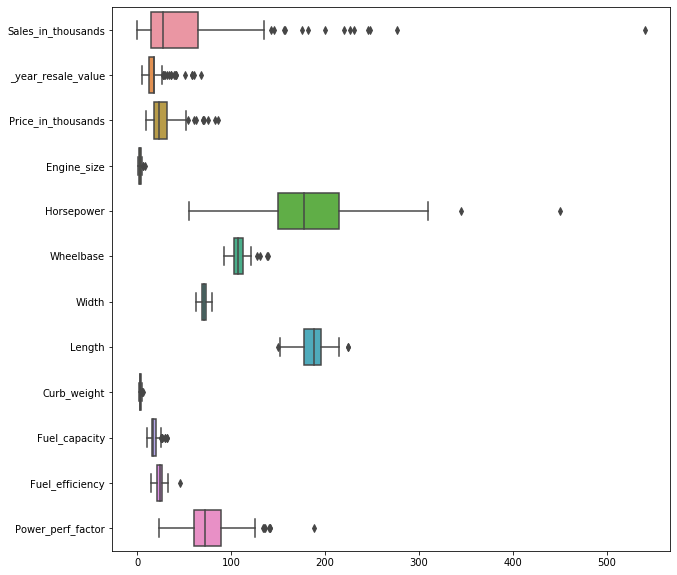

In [46]:
plt.figure(figsize=(10,10))
sns.boxplot(data=car,orient="h")

In [55]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 13 columns):
Sales_in_thousands    156 non-null float64
_year_resale_value    156 non-null float64
Vehicle_type          156 non-null object
Price_in_thousands    156 non-null float64
Engine_size           156 non-null float64
Horsepower            156 non-null int64
Wheelbase             156 non-null float64
Width                 156 non-null float64
Length                156 non-null float64
Curb_weight           156 non-null float64
Fuel_capacity         156 non-null float64
Fuel_efficiency       156 non-null int64
Power_perf_factor     156 non-null float64
dtypes: float64(10), int64(2), object(1)
memory usage: 16.0+ KB


In [0]:
x=car[["_year_resale_value","Vehicle_type","Price_in_thousands","Engine_size","Horsepower"]]

In [0]:
x=car.loc[:,car.columns!="Sales_in_thousands"]

In [60]:
x.head()

,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
0,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,58.280150
1,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,91.370778
2,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,90.345000
3,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,91.389779
4,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,62.777639


In [0]:
x=car.loc[:,car.columns!="Sales_in_thousands"]

In [62]:
def lr():
    total = car.isnull().sum().sort_values(ascending=False)
    percent = (car.isnull().sum()/car.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data.head(20)
    miss = print(missing_data)
    return miss
lr()

                    Total  Percent
Power_perf_factor       0      0.0
Fuel_efficiency         0      0.0
Fuel_capacity           0      0.0
Curb_weight             0      0.0
Length                  0      0.0
Width                   0      0.0
Wheelbase               0      0.0
Horsepower              0      0.0
Engine_size             0      0.0
Price_in_thousands      0      0.0
Vehicle_type            0      0.0
_year_resale_value      0      0.0
Sales_in_thousands      0      0.0


In [63]:
car_dummy =pd.DataFrame()                                             # Creating an empty data frame
def lr(car):
    dummies = pd.get_dummies(car, columns=['Vehicle_type'], drop_first=True)
    return dummies
car_dummy = lr(car)
print(car_dummy)

     Sales_in_thousands  ...  Vehicle_type_Passenger
0                16.919  ...                       1
1                39.384  ...                       1
2                14.114  ...                       1
3                 8.588  ...                       1
4                20.397  ...                       1
..                  ...  ...                     ...
151               3.545  ...                       1
152              15.245  ...                       1
153              17.531  ...                       1
154               3.493  ...                       1
155              18.969  ...                       1

[156 rows x 13 columns]


In [64]:
def lr(car_dummy):
    import pandas as pd
    Q1 = car_dummy.quantile(0.05)
    Q3 = car_dummy.quantile(0.95)
    Q_diff = Q3 - Q1
    car_out = car_dummy[~((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)]
    print(car_dummy[((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)])
    return car_out
car_dummy = lr(car_dummy)
print (car_dummy)

    Sales_in_thousands  ...  Vehicle_type_Passenger
38               0.916  ...                       1
55             540.561  ...                       0

[2 rows x 13 columns]
     Sales_in_thousands  ...  Vehicle_type_Passenger
0                16.919  ...                       1
1                39.384  ...                       1
2                14.114  ...                       1
3                 8.588  ...                       1
4                20.397  ...                       1
..                  ...  ...                     ...
151               3.545  ...                       1
152              15.245  ...                       1
153              17.531  ...                       1
154               3.493  ...                       1
155              18.969  ...                       1

[154 rows x 13 columns]


In [65]:
std = pd.DataFrame()
car_modify = car_dummy.drop(car_dummy[['Sales_in_thousands']], axis=1)
def lr(car_modify):
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler().fit(car_modify)
    st = scaler.transform(car_modify)
    return st
std = lr(car_modify)
print(std[1])

[ 0.2147879   0.09116773  0.18859201  0.77851497  0.10306365 -0.22729613
  0.43698582  0.22647767 -0.18117654  0.25690808  0.64045582  0.58234907]


In [0]:
columns = ['_year_resale_value','Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger']
def lr(std):
    cars= pd.DataFrame(std)
    cars.columns = columns
    return cars
cars = lr(std)

In [67]:
X = pd.DataFrame()
feature_cols = ['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']                
def lr(cars):
    X = cars[feature_cols]
    return X
X = lr(cars)
print(X)

     Price_in_thousands  Engine_size  ...  Fuel_efficiency  Vehicle_type_Passenger
0             -0.403867    -1.268771  ...         0.971917                0.582349
1              0.091168     0.188592  ...         0.256908                0.582349
2              0.134214     0.188592  ...         0.495244                0.582349
3              1.066888     0.500884  ...        -0.458101                0.582349
4             -0.225224    -1.268771  ...         0.733581                0.582349
..                  ...          ...  ...              ...                     ...
149           -0.195809    -1.164674  ...         0.256908                0.582349
150            0.026598    -0.644187  ...         0.256908                0.582349
151            0.119865    -0.644187  ...         0.256908                0.582349
152            1.317993    -0.748284  ...        -0.219765                0.582349
153            0.636423    -0.123700  ...         0.018572                0.582349

[15

In [68]:
y = pd.DataFrame()
def lr(car_dummy):
    y = car_dummy['Sales_in_thousands']
    return y
y = lr(car_dummy)
print(y.head())

0    16.919
1    39.384
2    14.114
3     8.588
4    20.397
Name: Sales_in_thousands, dtype: float64


In [0]:
from sklearn.model_selection import train_test_split
def lr():
    return train_test_split(X, y, test_size=0.30, random_state=1)
X_train, X_test, y_train, y_test = lr()

In [0]:
from sklearn.linear_model import LinearRegression
def lr():
    linreg = LinearRegression()
    return linreg
linreg = lr()

In [0]:
def lr():
    linreg.fit(X_train, y_train)  
lr()

In [73]:
def lr():
    print('Intercept:',linreg.intercept_)                                            
    print('Coefficients:',linreg.coef_)
lr()

Intercept: 47.72789672685098
Coefficients: [-23.07741376   4.10238868  16.68567193   7.28724395  -6.18121414]


In [74]:
def lr():
    feature_cols.insert(0,'Intercept')
    coef = linreg.coef_.tolist()
    coef.insert(0, linreg.intercept_)
    eq1 = zip(feature_cols, coef)
    for c1,c2 in eq1:
        print(c1,c2)
lr()

Intercept 47.72789672685098
Price_in_thousands -23.077413755540004
Engine_size 4.102388678841187
Wheelbase 16.685671928855623
Fuel_efficiency 7.2872439478384035
Vehicle_type_Passenger -6.181214142106865


In [75]:
y_pred_train = linreg.predict(X_train)
pred= pd.DataFrame(y_pred_train)
def lr():  
    pred.columns = ['Sales']
    head = pred.head()
    return head
lr()

,Sales
0,31.564489
1,46.217364
2,64.743473
3,38.420567
4,42.756993


In [76]:
y_pred_test = linreg.predict(X_test)    
pred_test= pd.DataFrame(y_pred_test)
def lr():
    pred_test.columns=['Sales']
    head = pred_test.head()
    return head
lr()

,Sales
0,52.661044
1,54.270825
2,18.088431
3,39.695263
4,64.242407


In [77]:
from sklearn import metrics
def lr():
    MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
    MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)
    print('MAE for training set is {}'.format(MAE_train))
    print('MAE for test set is {}'.format(MAE_test))
lr()

MAE for training set is 33.91516344645894
MAE for test set is 33.76393385260518


In [78]:
def lr():
    MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
    MSE_test = metrics.mean_squared_error(y_test, y_pred_test)
    print('MSE for training set is {}'.format(MSE_train))
    print('MSE for test set is {}'.format(MSE_test))
lr()


MSE for training set is 2528.1592310555034
MSE for test set is 2088.9620130557387


In [79]:
import numpy as np
def lr():
    RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
    RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
    print('RMSE for training set is {}'.format(RMSE_train))
    print('RMSE for test set is {}'.format(RMSE_test))
lr()

RMSE for training set is 50.280803802798374
RMSE for test set is 45.705163964870955


In [80]:
from sklearn.metrics import r2_score
def lr():
    R2_train = r2_score(y_train, y_pred_train) 
    R2_test = r2_score(y_test, y_pred_test) 
    print('R2 for training set is {}'.format(R2_train))
    print('R2 for test set is {}'.format(R2_test))
lr()




R2 for training set is 0.2012340722572875
R2 for test set is 0.26292902694603515
